In [54]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("nndb_flat.csv") 


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
ID                  8618 non-null int64
FoodGroup           8618 non-null object
ShortDescrip        8618 non-null object
Descrip             8618 non-null object
CommonName          1063 non-null object
MfgName             1560 non-null object
ScientificName      732 non-null object
Energy_kcal         8618 non-null float64
Protein_g           8618 non-null float64
Fat_g               8618 non-null float64
Carb_g              8618 non-null float64
Sugar_g             8618 non-null float64
Fiber_g             8618 non-null float64
VitA_mcg            8618 non-null float64
VitB6_mg            8618 non-null float64
VitB12_mcg          8618 non-null float64
VitC_mg             8618 non-null float64
VitE_mg             8618 non-null float64
Folate_mcg          8618 non-null float64
Niacin_mg           8618 non-null float64
Riboflavin_mg       8618 non-null float64
Thiamin_mg          

In [57]:
used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.9) & 
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k], 
                          np.round(df.corr().iloc[k, i], 2)))

            
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                        [i[1] for i in corrs],
                        [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column',1:'row',2:'corr'})
corrsdf[:15]

,column,row,corr
0,VitA_mcg,VitA_USRDA,1
1,VitB6_mg,VitB6_USRDA,1
2,VitB12_mcg,VitB12_USRDA,1
3,VitC_mg,VitC_USRDA,1
4,VitE_mg,VitE_USRDA,1
5,Folate_mcg,Folate_USRDA,1
6,Niacin_mg,Niacin_USRDA,1
7,Riboflavin_mg,Riboflavin_USRDA,1
8,Thiamin_mg,Thiamin_USRDA,1
9,Calcium_mg,Calcium_USRDA,1


In [58]:
df.drop(df.columns[df.columns.str.contains('_USRDA')].values, 
        inplace=True, axis=1)

In [59]:
df.set_index('ID', inplace=True)
df_desc = df.iloc[:, :6]
df.drop(df.columns[:6].values, axis=1, inplace=True)

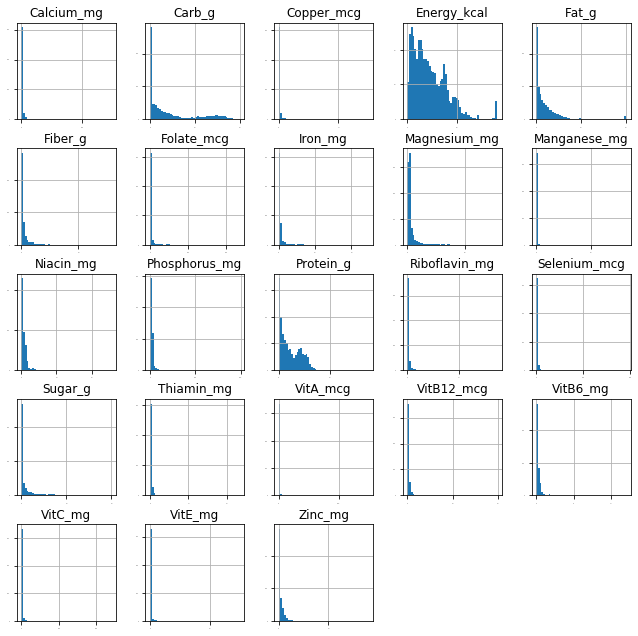

In [60]:
ax = df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [61]:
from scipy.stats import boxcox
# add 1 because data must be positive (we have many zeros)
df = df + 1
df_TF = pd.DataFrame(index=df.index)
for i in df.columns.values:
    df_TF["%s_TF" % i] = boxcox(df.loc[:, i])[0]

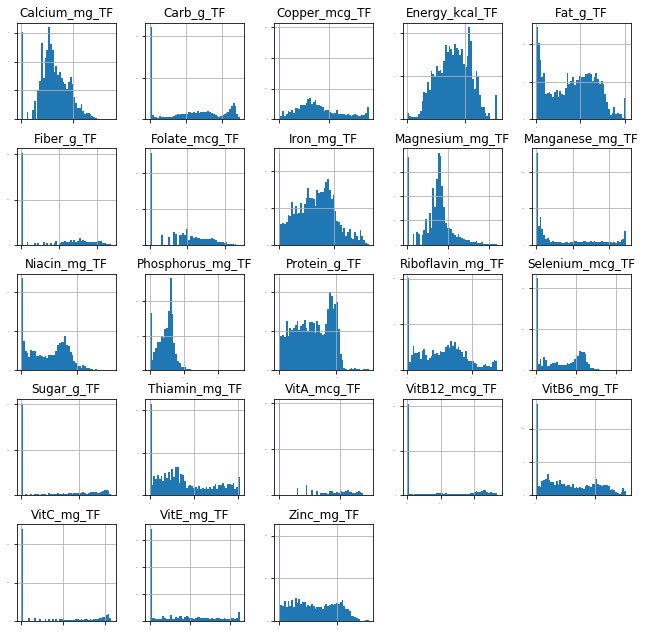

In [62]:
ax = df_TF.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

In [63]:
# from sklearn.preprocessing import StandardScaler
df_TF = StandardScaler().fit_transform(df_TF)

print ("mean: ", np.round(df_TF.mean(), 2))
print ("standard dev: ", np.round(df_TF.std(), 2))

mean:  -0.0
standard dev:  1.0


In [64]:
mean_vec = np.mean(df_TF, axis=0)
cov_mat = (df_TF - mean_vec).T.dot((df_TF - mean_vec)) / (df_TF.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00011605  0.33727504  0.78609931  0.29294538  0.1106689   0.12987026
  -0.09093813  0.1864142   0.12925181 -0.33470388  0.21932799  0.06043694
   0.34830862  0.36348217  0.42629771  0.099629    0.1891642   0.40226158
   0.26776646  0.10302147  0.37197004  0.22139989  0.31947305]
 [ 0.33727504  1.00011605  0.45405959 -0.40651478 -0.41122317 -0.26944726
  -0.02029581  0.58697201  0.65362593 -0.39635002  0.03742236  0.14518398
   0.6846442   0.5722225   0.37578169  0.17195537  0.35092564  0.5307038
   0.4509764  -0.06260599  0.74305778  0.70227231  0.77609283]
 [ 0.78609931  0.45405959  1.00011605 -0.12579262 -0.11815544 -0.14615089
  -0.00721814  0.18020389  0.32388243 -0.39397438  0.23745435 -0.06159502
   0.33424014  0.32098922  0.26709488  0.05147661  0.07805596  0.27989168
   0.12847643 -0.10080304  0.36771174  0.31859641  0.38700136]
 [ 0.29294538 -0.40651478 -0.12579262  1.00011605  0.65747591  0.71950469
   0.012143   -0.20840965 -0.51488284  0.24491239  0.

In [65]:
cov_mat = np.cov(df_TF.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[7.94855765 4.13381409 2.11656465 1.42074871 1.26975574 0.86584592
 0.68921682 0.59043445 0.52777718 0.07186085 0.44166498 0.42069271
 0.39598144 0.33211909 0.30768699 0.12545178 0.13556003 0.1538837
 0.24757536 0.17488325 0.22476053 0.20205504 0.20577816]


In [66]:
#Fetch eigen vectors using SVD
eig_vecs,s,v = np.linalg.svd(df_TF.T)


array([[-1.65126285e-01,  4.18501130e-02, -5.08062047e-01,
         1.58787185e-01, -2.04336041e-01,  1.80913208e-03,
        -2.30397835e-01,  1.81383994e-01, -9.68747362e-02,
         1.06435860e-01, -1.45702301e-01,  1.41609667e-01,
        -1.06699263e-01,  8.35121582e-02, -1.53289014e-01,
         1.20599054e-01, -2.17138385e-01,  5.94332914e-02,
        -6.74566777e-02,  7.75871191e-02,  1.15935559e-01,
        -2.28132085e-01, -5.61042214e-01],
       [-2.86085952e-01, -1.96126977e-01, -2.68284160e-02,
        -9.09436328e-02, -4.61478261e-02,  1.49797322e-01,
         1.14003881e-01,  2.41629462e-02,  6.86941384e-02,
        -3.00585443e-02,  5.56251025e-02,  4.82969267e-02,
         1.50738591e-01, -3.44909525e-01, -7.02210366e-02,
         1.83871414e-02,  2.37896750e-01,  1.21523085e-01,
        -3.70295695e-01,  6.85306152e-02,  3.18721684e-01,
        -5.51945985e-01,  2.34819195e-01],
       [-1.61488469e-01, -1.23575485e-01, -4.09504853e-01,
         2.82774466e-01, -2.6

In [67]:
# Make a list of (eigenvalue, eigenvector) tuples and sort them acc to decreasing order of corresponsing eigen values
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues and their corresponding eigen vectors in descending order:')
for i in eig_pairs:
    print(i[0] )
    print(i[1])


Eigenvalues and their corresponding eigen vectors in descending order:
7.94855764513146
[-0.16512628 -0.28608595 -0.16148847  0.03376713  0.07613188  0.0046634
 -0.05699607 -0.2706465  -0.2213216   0.06983022 -0.09080767 -0.16785649
 -0.29409384 -0.28268656 -0.23543974 -0.13551157 -0.22023186 -0.26231406
 -0.26024478 -0.08876195 -0.30500043 -0.26411374 -0.30850596]
4.133814094945031
[ 0.04185011 -0.19612698 -0.12357548  0.41454153  0.29564023  0.39783227
  0.0957005  -0.0521657  -0.26567098  0.24231394  0.10430994  0.23839136
 -0.06419697  0.0242405   0.15964121  0.23105209  0.18163094  0.11891749
  0.19983767  0.34360302 -0.0015173  -0.13888339 -0.10052931]
2.1165646535932745
[-0.50806205 -0.02682842 -0.40950485 -0.25095208 -0.20865125 -0.15364033
  0.29808857  0.12185037  0.10747636  0.33448952  0.01247288  0.26429784
 -0.0559907  -0.06207402 -0.19112446  0.12562075  0.1777019  -0.11506541
  0.10079212  0.10875496  0.0109477   0.1317977   0.05100221]
1.4207487077377254
[ 0.15878718 -

In [68]:
tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp[:5])


[0.34554936194263686, 0.1797101922979272, 0.09201387197681926, 0.0617645151935584, 0.055200365535392, 0.03764110666640128, 0.029962471734568896, 0.02566808443572899, 0.02294417136898081, 0.019200596827986006, 0.0182888649839761, 0.017214586456317856, 0.014438284866958168, 0.013376143063579413, 0.010762897240187839, 0.009771063014412518, 0.008945838489320611, 0.00878398240061739, 0.007602737381446975, 0.006689819288483658, 0.00589323023262758, 0.0054537922289248815, 0.0031240223731476067]
[0.34554936 0.52525955 0.61727343 0.67903794 0.73423831]


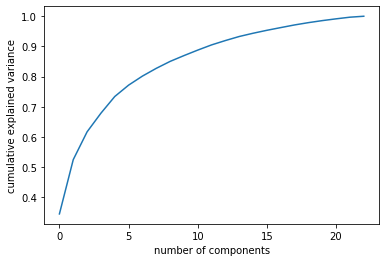

In [79]:
plt.plot(np.cumsum(var_exp))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [70]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(23,1),
                    eig_pairs[1][1].reshape(23,1),
                     eig_pairs[2][1].reshape(23,1),
                      eig_pairs[3][1].reshape(23,1),
                      eig_pairs[4][1].reshape(23,1),
                     ))
                    

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.16512628  0.04185011 -0.50806205  0.15878718 -0.20433604]
 [-0.28608595 -0.19612698 -0.02682842 -0.09094363 -0.04614783]
 [-0.16148847 -0.12357548 -0.40950485  0.28277447 -0.26673961]
 [ 0.03376713  0.41454153 -0.25095208 -0.02518521  0.10139647]
 [ 0.07613188  0.29564023 -0.20865125  0.27965746  0.2642623 ]
 [ 0.0046634   0.39783227 -0.15364033 -0.11912218  0.0758999 ]
 [-0.05699607  0.0957005   0.29808857  0.53979166  0.05792837]
 [-0.2706465  -0.0521657   0.12185037 -0.01138152  0.25466299]
 [-0.2213216  -0.26567098  0.10747636  0.16706766  0.1956371 ]
 [ 0.06983022  0.24231394  0.33448952  0.12928762  0.24963405]
 [-0.09080767  0.10430994  0.01247288  0.53770958 -0.25060476]
 [-0.16785649  0.23839136  0.26429784  0.01165532 -0.10499969]
 [-0.29409384 -0.06419697 -0.0559907  -0.06522343  0.26442327]
 [-0.28268656  0.0242405  -0.06207402  0.06185511  0.32254463]
 [-0.23543974  0.15964121 -0.19112446 -0.0865303   0.28194393]
 [-0.13551157  0.23105209  0.12562075  0.188

In [71]:
Y = (matrix_w.T).dot(df_TF.T)



In [72]:
new_M=matrix_w.dot(Y)

[[ 1.23545328  1.25264745  1.42868829 ...  0.06367161 -0.29488507
  -0.71561995]
 [-0.61698639 -0.60310644 -0.82994441 ... -1.01746456  0.63127753
   0.49528787]
 [ 2.01692647  1.99836158  2.19078471 ... -0.37313353  0.20044436
  -0.1852623 ]
 ...
 [-0.69806491 -0.65811386 -1.03978484 ... -1.10417572  0.70467619
   0.43509975]
 [ 0.00374503  0.01464688 -0.33977182 ... -1.4327563   1.1664165
   0.92130908]
 [-0.84666232 -0.82149021 -1.18569789 ... -1.17113688  0.7461254
   0.58807534]]


In [73]:
R=Y.T
df = df.join(df_desc)
df["Feature1"]=R[:,0]

In [74]:
df.sort_values(by='Feature1')['FoodGroup'][:500].value_counts()

Breakfast Cereals                      153
Nut and Seed Products                   66
Baby Foods                              58
Legumes and Legume Products             53
Spices and Herbs                        26
Poultry Products                        20
Beef Products                           14
Snacks                                  14
Vegetables and Vegetable Products       14
Lamb, Veal, and Game Products           14
Dairy and Egg Products                  11
Beverages                               11
Cereal Grains and Pasta                 10
American Indian/Alaska Native Foods      8
Pork Products                            7
Finfish and Shellfish Products           7
Sweets                                   6
Baked Products                           5
Sausages and Luncheon Meats              3
Name: FoodGroup, dtype: int64

In [75]:
df["Feature2"]=R[:,1]
df.sort_values(by='Feature2')['FoodGroup'][:500].value_counts()

Beef Products                          353
Lamb, Veal, and Game Products           71
Poultry Products                        21
American Indian/Alaska Native Foods     13
Fats and Oils                           13
Pork Products                            9
Finfish and Shellfish Products           8
Sausages and Luncheon Meats              4
Fast Foods                               3
Restaurant Foods                         3
Beverages                                2
Name: FoodGroup, dtype: int64

In [76]:
df["Feature3"]=R[:,2]
df.sort_values(by='Feature3')['FoodGroup'][:500].value_counts()

Baked Products                         303
Fats and Oils                          108
Sweets                                  38
Breakfast Cereals                       28
American Indian/Alaska Native Foods      7
Legumes and Legume Products              3
Beverages                                3
Snacks                                   3
Fast Foods                               2
Nut and Seed Products                    2
Pork Products                            1
Meals, Entrees, and Side Dishes          1
Soups, Sauces, and Gravies               1
Name: FoodGroup, dtype: int64

In [77]:
df["Feature4"]=R[:,3]
df.sort_values(by='Feature4')['FoodGroup'][:500].value_counts()

Legumes and Legume Products            124
Cereal Grains and Pasta                 98
Vegetables and Vegetable Products       89
Baked Products                          39
Nut and Seed Products                   34
Breakfast Cereals                       23
Snacks                                  19
American Indian/Alaska Native Foods     18
Beverages                               16
Sweets                                  15
Sausages and Luncheon Meats              6
Lamb, Veal, and Game Products            6
Spices and Herbs                         5
Fruits and Fruit Juices                  2
Finfish and Shellfish Products           2
Soups, Sauces, and Gravies               2
Poultry Products                         1
Baby Foods                               1
Name: FoodGroup, dtype: int64

In [78]:
df["Feature5"]=R[:,4]
df.sort_values(by='Feature5')['FoodGroup'][:500].value_counts()

Fats and Oils                          145
Nut and Seed Products                   81
Sweets                                  51
Legumes and Legume Products             50
Snacks                                  41
Baked Products                          24
Sausages and Luncheon Meats             17
American Indian/Alaska Native Foods     16
Dairy and Egg Products                  13
Cereal Grains and Pasta                 12
Finfish and Shellfish Products          12
Breakfast Cereals                        8
Fast Foods                               5
Spices and Herbs                         4
Restaurant Foods                         4
Beverages                                3
Poultry Products                         3
Beef Products                            3
Lamb, Veal, and Game Products            2
Pork Products                            2
Soups, Sauces, and Gravies               1
Baby Foods                               1
Fruits and Fruit Juices                  1
Vegetables 